In [1]:
# primero nuestras librerias!

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col=0) 

df.sample(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
100,Luxembourg,242.0,LU,53.7,2.586,2.0,10.30,352.0,Luxembourg City,8.988,115.09,1.7,EUR,1.37,35.7,1.19,7.110492e+10,102.3,19.2,1.9,Luxembourg City,82.1,5.0,13.05,Luxembourgish,10.6,3.01,645.397,59.3,26.5,20.4,5.36,565.488,49.815273,6.129583,Europe
19,Bhutan,20.0,BT,13.6,38.394,6.0,17.26,975.0,Thimphu,1.261,167.18,2.7,NaN,1.98,72.5,0.98,2.446674e+09,100.1,15.6,24.8,Thimphu,71.5,183.0,0.32,Dzongkha,19.8,0.42,727.145,66.7,16.0,35.3,2.34,317.538,27.514162,90.433601,Asia


In [3]:
df.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')


* 'country': 'país'
* 'density': 'densidad'
* 'abbreviation': 'abreviatura'
* 'agricultural_land': 'tierra agrícola'
* 'land_area': 'área terrestre'
* 'armed_forces_size': 'tamaño de las fuerzas armadas'
* 'birth_rate': 'tasa de natalidad'
* 'calling_code': 'código de llamada'
* 'capital/major_city': 'capital/ciudad principal'
* 'co2-emissions': 'emisiones de CO2'
* 'cpi': 'IPC (Índice de Precios al Consumidor)'
* 'cpi_change': 'cambio del IPC'
* 'currency-code': 'código de moneda'
* 'fertility_rate': 'tasa de fertilidad'
* 'forested_area': 'área forestal'
* 'gasoline_price': 'precio de la gasolina'
* 'gdp': 'PIB (Producto Interno Bruto)'
* 'gross_primary_education_enrollment': 'tasa bruta de matriculación en educación primaria'
* 'gross_tertiary_education_enrollment': 'tasa bruta de matriculación en educación terciaria'
* 'infant_mortality': 'mortalidad infantil'
* 'largest_city': 'ciudad más grande'
* 'life_expectancy': 'esperanza de vida'
* 'maternal_mortality_ratio': 'tasa de mortalidad materna'
* 'minimum_wage': 'salario mínimo'
* 'official_language': 'idioma oficial'
* 'out_of_pocket_health_expenditure': 'gasto sanitario de bolsillo'
* 'physicians_per_thousand': 'médicos por cada mil habitantes'
* 'population': 'población'
* 'population_labor_force_participation': 'participación de la población en la fuerza laboral'
* 'tax_revenue': 'ingresos fiscales'
* 'total_tax_rate': 'tasa impositiva total'
* 'unemployment_rate': 'tasa de desempleo'
* 'urban_population': 'población urbana'
* 'latitude': 'latitud'
* 'longitude': 'longitud'
* 'continent': 'continente'

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               195 non-null    object 
 1   density                               195 non-null    float64
 2   abbreviation                          188 non-null    object 
 3   agricultural_land                     188 non-null    float64
 4   land_area                             165 non-null    float64
 5   armed_forces_size                     166 non-null    float64
 6   birth_rate                            189 non-null    float64
 7   calling_code                          194 non-null    float64
 8   capital/major_city                    192 non-null    object 
 9   co2-emissions                         183 non-null    float64
 10  cpi                                   175 non-null    float64
 11  cpi_change              

# Ejercicios

1. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [4]:
df_contienente = df.groupby("continent")["country"].count().reset_index()
df_contienente

,continent,country
0,Africa,53
1,Asia,45
2,Central America,20
3,Europe,47
4,North America,2
5,Oceania,14
6,South America,13


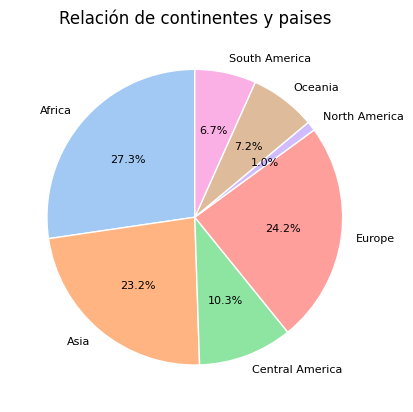

In [5]:
colores = sns.color_palette("pastel") # paleta de colores de seaborn

plt.pie("country", labels= "continent",
        data = df_contienente, 
        autopct= '%1.1f%%',
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90,
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }) # mejora en los bordes

plt.title("Relación de continentes y paises", fontsize=12) # mejora en el titulo
plt.show()

2. ¿Cuáles son los 10 países con la mayor área forestal?

C:\Users\InvitadoLaptop\AppData\Local\Temp\ipykernel_10100\416958048.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="country",


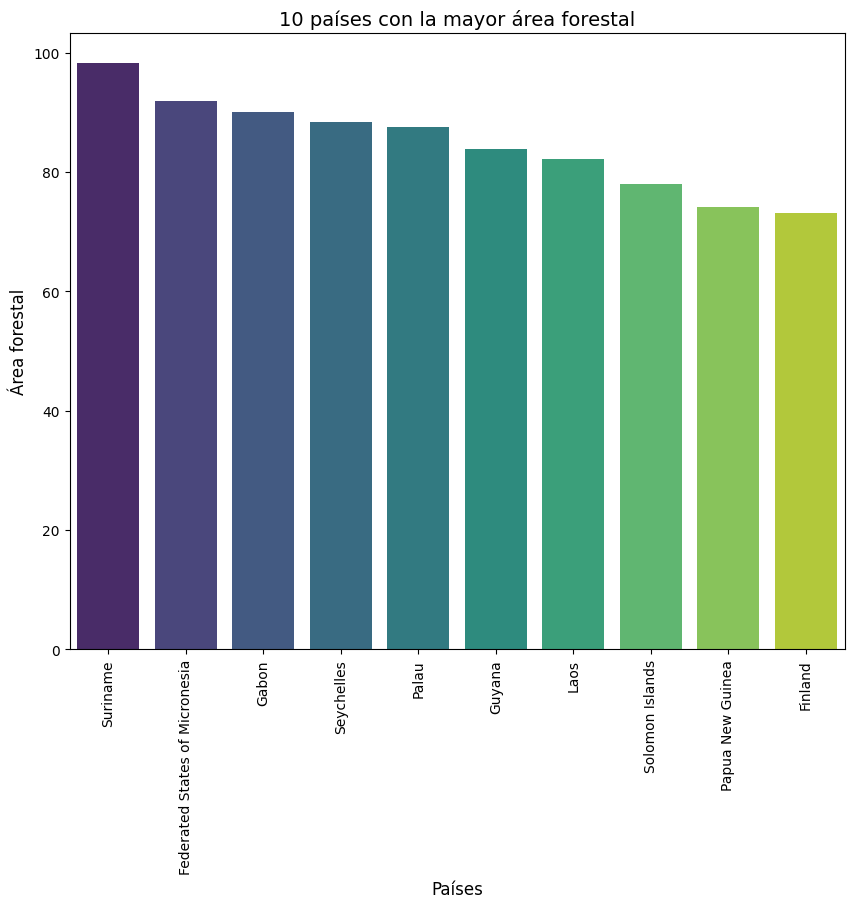

In [10]:
df_forested = df[["country", "forested_area"]]
df_forest_sorted = df_forested.sort_values(by="forested_area", ascending=False)
top_10_forest = df_forest_sorted.head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x="country",
            y="forested_area",  # Especifica el área forestal en el eje Y
            data=top_10_forest,
            palette="viridis")

plt.xticks(rotation = 90)

plt.title("10 países con la mayor área forestal", fontsize=14)
plt.xlabel("Países", fontsize=12)
plt.ylabel("Área forestal", fontsize=12)
plt.show()

3. ¿Cómo se distribuye la densidad de población entre los países?

C:\Users\InvitadoLaptop\AppData\Local\Temp\ipykernel_10100\3905427127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="country",


Text(0, 0.5, 'Densidad')

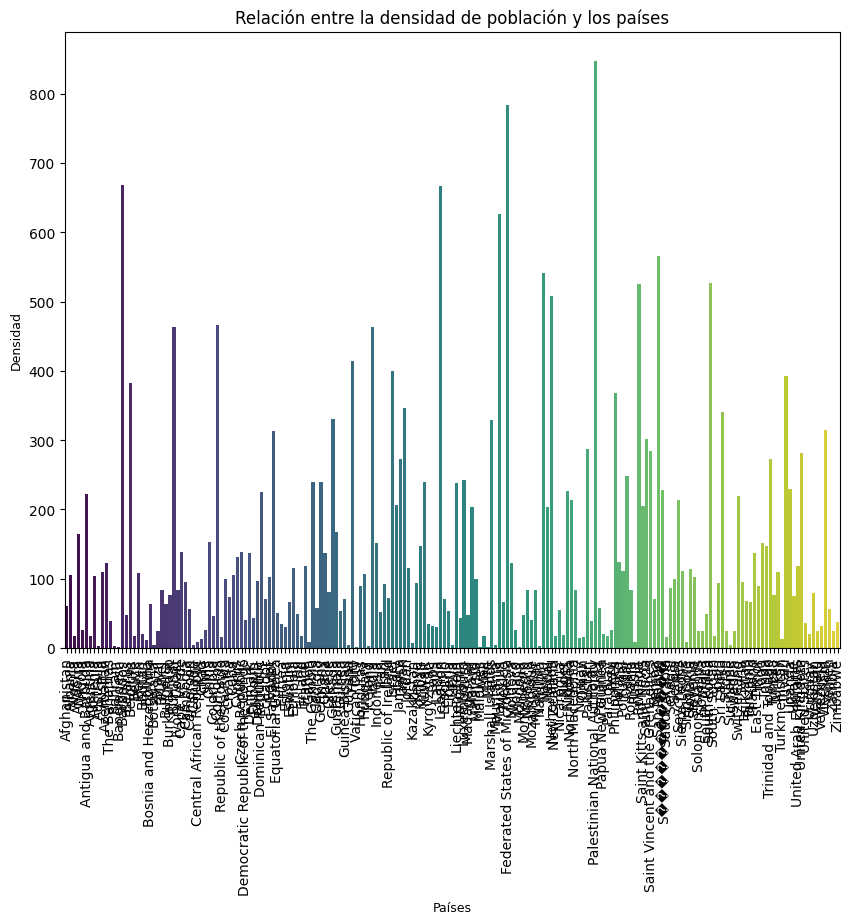

In [11]:
plt.figure(figsize=(10, 8))
sns.barplot(x="country",
            y="density",  # Especifica el área forestal en el eje Y
            data=df,
            palette="viridis")

plt.xticks(rotation = 90)

plt.title("Relación entre la densidad de población y los países", fontsize=12)
plt.xlabel("Países", fontsize=9)
plt.ylabel("Densidad", fontsize=9)

C:\Users\InvitadoLaptop\AppData\Local\Temp\ipykernel_10100\2884449132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="country",


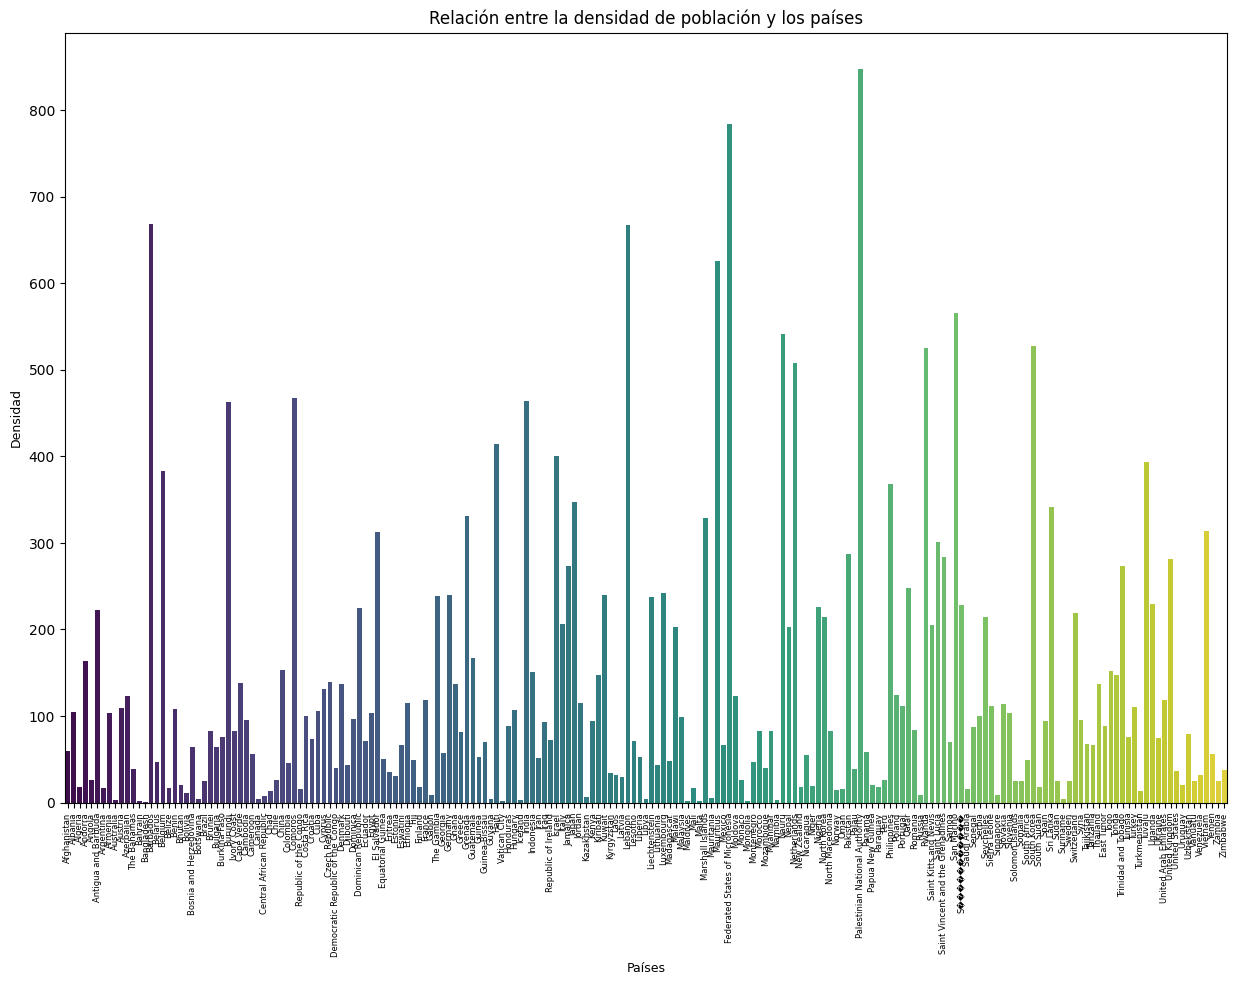

In [12]:
plt.figure(figsize=(15, 10))
sns.barplot(x="country",
            y="density",
            data=df,
            palette="viridis")

plt.xticks(rotation=90, fontsize=6)  # Reduce el tamaño de la fuente
plt.title("Relación entre la densidad de población y los países", fontsize=12)
plt.xlabel("Países", fontsize=9)
plt.ylabel("Densidad", fontsize=9)
plt.show()

C:\Users\InvitadoLaptop\AppData\Local\Temp\ipykernel_10100\1542468989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="country",


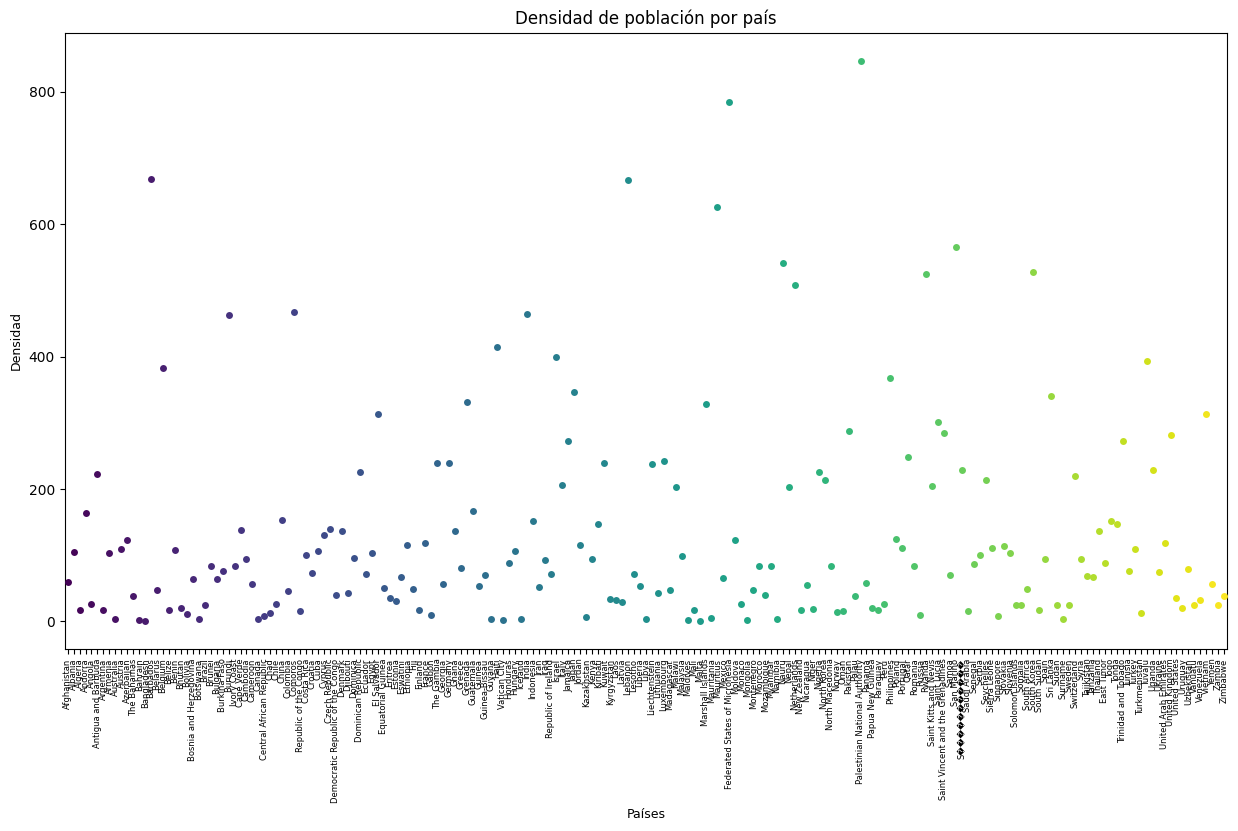

In [13]:
plt.figure(figsize=(15, 8))
sns.stripplot(x="country",
                y="density",
                data=df,
                jitter=True, #Agrega ruido a los datos para evitar la sobreposición.
                palette="viridis")

plt.xticks(rotation=90, fontsize=6)
plt.title("Densidad de población por país", fontsize=12)
plt.xlabel("Países", fontsize=9)
plt.ylabel("Densidad", fontsize=9)
plt.show()

In [14]:
df_densidad_pais = df.groupby("continent")["density"].mean().reset_index()
df_densidad_pais

,continent,density
0,Africa,105.094340
1,Asia,166.081422
2,Central America,201.500000
3,Europe,121.781277
4,North America,20.000000
5,Oceania,185.000000
6,South America,44.076923


C:\Users\InvitadoLaptop\AppData\Local\Temp\ipykernel_10100\2799757968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="density",


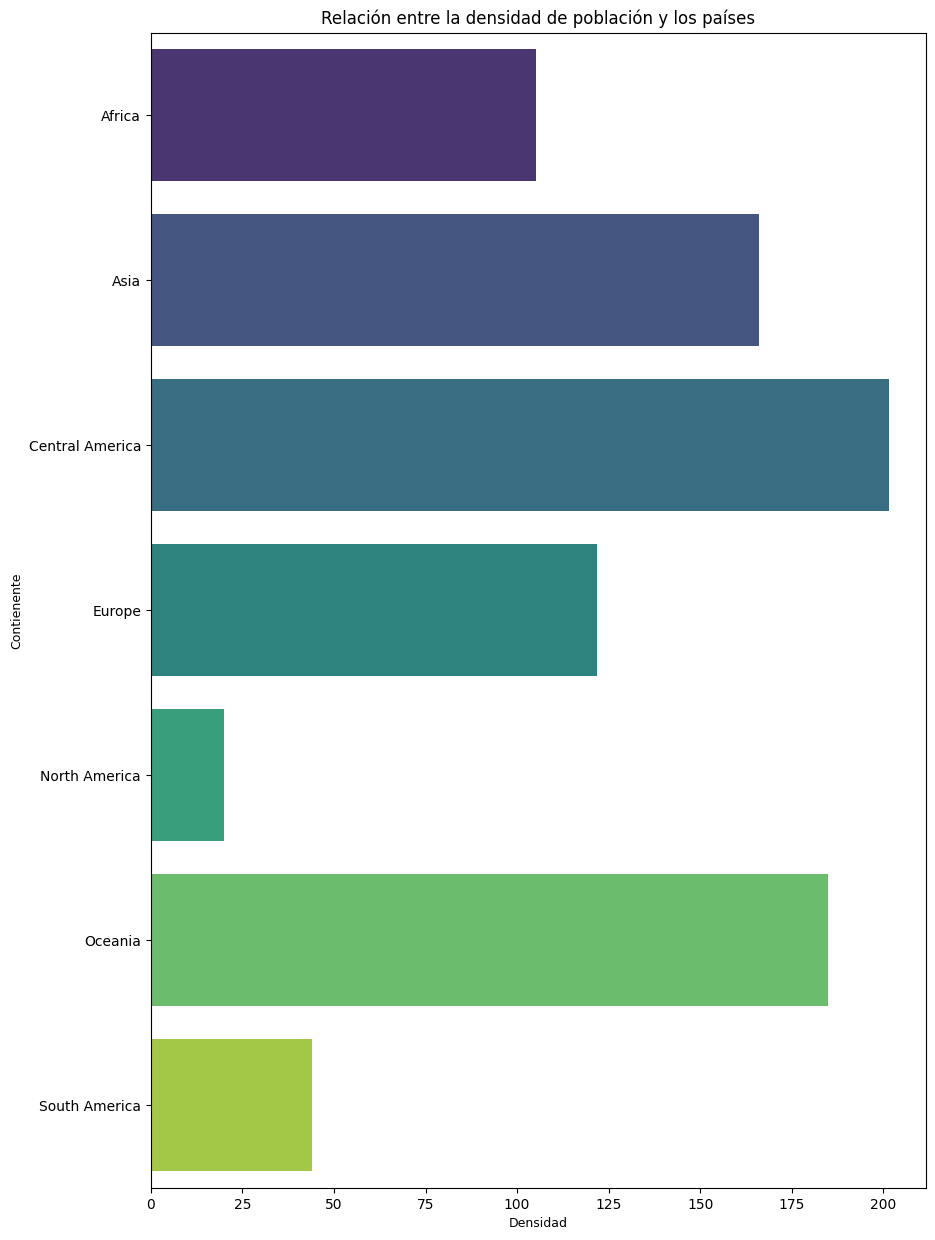

In [15]:
plt.figure(figsize=(10, 15))
sns.barplot(x="density",
            y="continent",
            data=df_densidad_pais,
            palette="viridis")

plt.title("Relación entre la densidad de población y los países", fontsize=12)
plt.xlabel("Densidad", fontsize=9)
plt.ylabel("Contienente", fontsize=9)  
plt.show()

4. ¿Existe una relación entre el PIB y la tasa de desempleo de los países?

In [ ]:
"gdp"
"unemployment_rate"

'gdp'

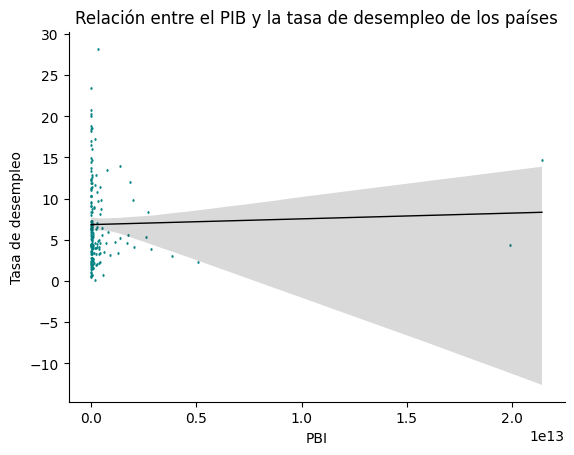

In [ ]:
sns.regplot(x = "gdp", 
            y = "unemployment_rate", 
            data = df, 
            
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("PBI")
plt.ylabel("Tasa de desempleo")

# ponemos título a la gráfica
plt.title("Relación entre el PIB y la tasa de desempleo de los países")

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

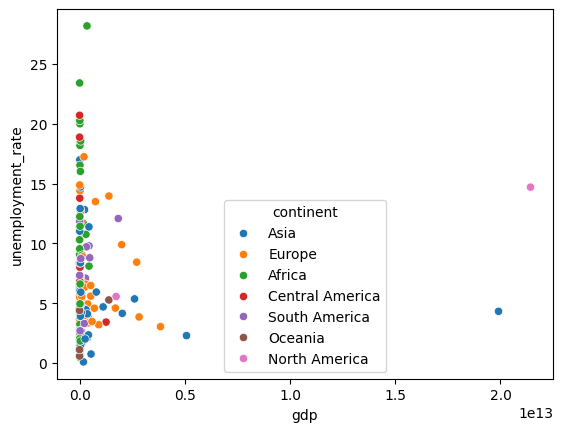

In [20]:
sns.scatterplot(x="gdp", data=df, y="unemployment_rate", hue="continent");

''

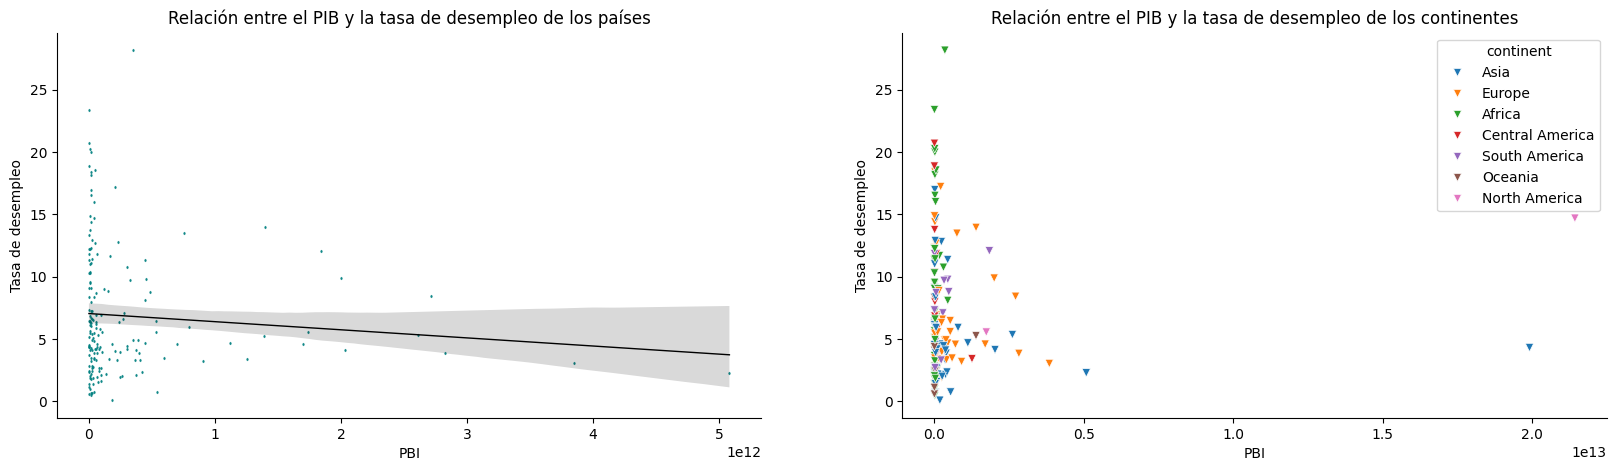

In [31]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# Vamos a empezar a insertar alguna gráfica, en concreto vamos a rellenar la primera (la de la izquierda) con el regplot que creamos anteriormente
# fijaos como no cambia nada, lo unico que hemos hecho ha sido añadir el parémtro 'ax' para hacer referencia en cual de los subplots lo queremos
# en este caso pondremos ax = 0, porque ya sabemos que en Python todo empieza siempre en 0. 
sns.regplot(x = "gdp", 
            y = "unemployment_rate", 
            data = df[df["gdp"]<10000000000000], 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1}, # cambiamos el color y el tamaño de los puntos del scaterplot
            ax = axes[0] # especificamos el eje en el que queremos poner la gráfica. En este caso en el eje 0. 
            )

# para añadir un título usaremos el parámetro '.set_title()' 
axes[0].set_title("Relación entre el PIB y la tasa de desempleo de los países")

# cambiamos el nombre del eje x e y usando el método '.set_xlabel()' y '.set_ylabel()' respectivamente. 
axes[0].set_xlabel("PBI")

# cambiamos el nombre de los ejes usando los métodos
axes[0].set_ylabel("Tasa de desempleo")

# quitamos la linea de la derecha de la gráfica
axes[0].spines['right'].set_visible(False)

# quitamos la linea de la derecha de la gráfica
axes[0].spines['top'].set_visible(False)


# AÑADIMOS LA INFORMACIÓN QUE QUEREMOS EN EL SEGUNDO SUBPLOT, AÑADIENDO EL PARÁMETRO 'AX'. En este caso pondremos ax = axes[1] porque queremos que vaya en el segundo subplot. 
sns.scatterplot(x="gdp", 
                data=df, 
                y="unemployment_rate", 
                hue="continent",
                marker= "v",
                ax = axes[1])


# para añadir un título usaremos el parámetro '.set_title()' 
axes[1].set_title("Relación entre el PIB y la tasa de desempleo de los continentes")

# cambiamos el nombre del eje x e y usando el método '.set_xlabel()' y '.set_ylabel()' respectivamente. 
axes[1].set_xlabel("PBI")

# cambiamos el nombre de los ejes usando los métodos
axes[1].set_ylabel("Tasa de desempleo")

# quitamos la linea de la derecha de la gráfica
axes[1].spines['right'].set_visible(False)

# quitamos la linea de la derecha de la gráfica
axes[1].spines['top'].set_visible(False)
;

In [28]:
df[df["gdp"]<10000000000000]

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912.050,343.0,17.88,58.0,Caracas,164.175,NaN,254.9,VED,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.01,Spanish,45.8,1.92,NaN,59.7,NaN,73.3,8.80,NaN,6.423750,-66.589730,South America
191,Vietnam,314.0,VN,39.3,331.210,522.0,16.75,84.0,Hanoi,192.668,163.52,2.8,VND,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.73,Vietnamese,43.5,0.82,NaN,77.4,19.1,37.6,2.01,NaN,14.058324,108.277199,Asia
192,Yemen,56.0,YE,44.6,527.968,40.0,30.45,967.0,Sanaa,10.609,157.58,8.1,YER,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.0,0.31,NaN,38.0,NaN,26.6,12.91,NaN,15.552727,48.516388,Asia
193,Zambia,25.0,ZM,32.1,752.618,16.0,36.19,260.0,Lusaka,5.141,212.31,9.2,ZMW,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,Lusaka,63.5,213.0,0.24,English,27.5,1.19,NaN,74.6,16.2,15.6,11.43,NaN,-13.133897,27.849332,Africa


5. ¿Cómo se relacionan la tasa de mortalidad infantil y la esperanza de vida?

''

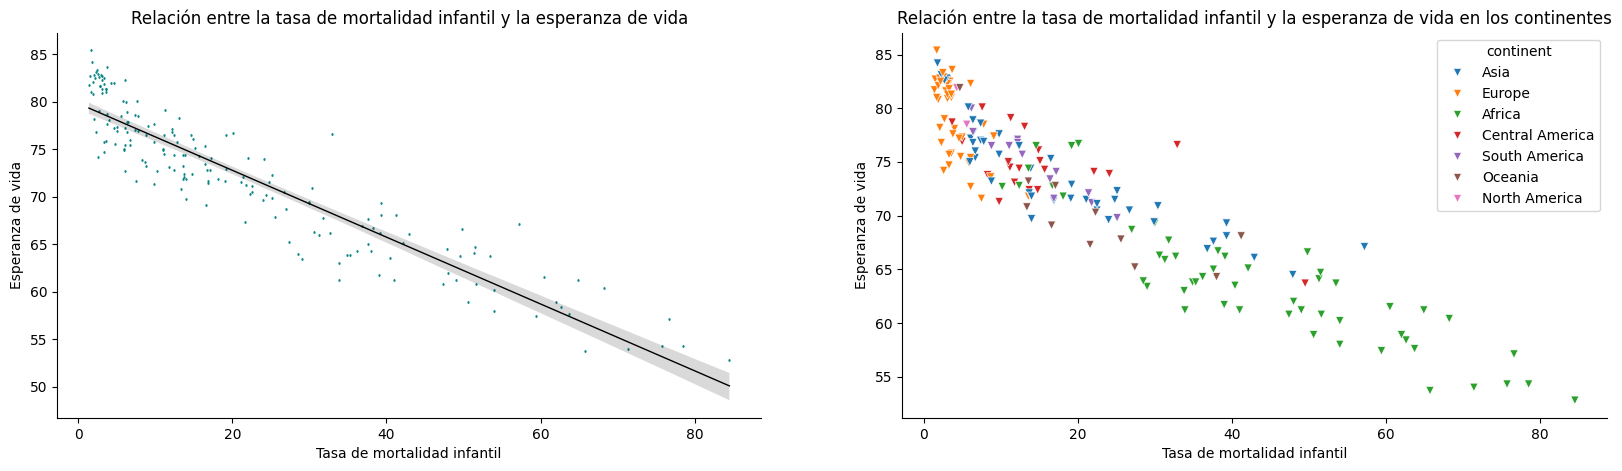

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# Vamos a empezar a insertar alguna gráfica, en concreto vamos a rellenar la primera (la de la izquierda) con el regplot que creamos anteriormente
# fijaos como no cambia nada, lo unico que hemos hecho ha sido añadir el parémtro 'ax' para hacer referencia en cual de los subplots lo queremos
# en este caso pondremos ax = 0, porque ya sabemos que en Python todo empieza siempre en 0. 
sns.regplot(x = "infant_mortality", 
            y = "life_expectancy", 
            data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1}, # cambiamos el color y el tamaño de los puntos del scaterplot
            ax = axes[0] # especificamos el eje en el que queremos poner la gráfica. En este caso en el eje 0. 
            )

# para añadir un título usaremos el parámetro '.set_title()' 
axes[0].set_title("Relación entre la tasa de mortalidad infantil y la esperanza de vida")

# cambiamos el nombre del eje x e y usando el método '.set_xlabel()' y '.set_ylabel()' respectivamente. 
axes[0].set_xlabel("Tasa de mortalidad infantil")

# cambiamos el nombre de los ejes usando los métodos
axes[0].set_ylabel("Esperanza de vida")

# quitamos la linea de la derecha de la gráfica
axes[0].spines['right'].set_visible(False)

# quitamos la linea de la derecha de la gráfica
axes[0].spines['top'].set_visible(False)


# AÑADIMOS LA INFORMACIÓN QUE QUEREMOS EN EL SEGUNDO SUBPLOT, AÑADIENDO EL PARÁMETRO 'AX'. En este caso pondremos ax = axes[1] porque queremos que vaya en el segundo subplot. 
sns.scatterplot(x="infant_mortality", 
                data=df, 
                y="life_expectancy", 
                hue="continent",
                marker= "v",
                ax = axes[1])


# para añadir un título usaremos el parámetro '.set_title()' 
axes[1].set_title("Relación entre la tasa de mortalidad infantil y la esperanza de vida en los continentes")

# cambiamos el nombre del eje x e y usando el método '.set_xlabel()' y '.set_ylabel()' respectivamente. 
axes[1].set_xlabel("Tasa de mortalidad infantil")

# cambiamos el nombre de los ejes usando los métodos
axes[1].set_ylabel("Esperanza de vida")

# quitamos la linea de la derecha de la gráfica
axes[1].spines['right'].set_visible(False)

# quitamos la linea de la derecha de la gráfica
axes[1].spines['top'].set_visible(False)
;